In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
class DeepFeatureExtractor:
    def __init__(self):
        # Load ResNet50 without top classification layer
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        self.feature_extractor = tf.keras.Model(
            inputs=base_model.input,
            outputs=base_model.get_layer('avg_pool').output
        )

    def extract_features(self, image_path):
        # Load and preprocess image
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract deep features
        features = self.feature_extractor.predict(img_array)
        return features.flatten()

In [ ]:
def load_dataset(data_dir):
    images, labels, class_names = [], [], []

    # Iterate through subdirectories (classes)
    for class_name in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_names.append(class_name)
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                images.append(img_path)
                labels.append(len(class_names) - 1)

    return images, labels, class_names

In [ ]:
def main(dataset_path):
    # Load dataset
    image_paths, labels, class_names = load_dataset(dataset_path)

    # Feature extraction
    extractor = DeepFeatureExtractor()
    features = [extractor.extract_features(path) for path in image_paths]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Train SVM classifier
    svm_classifier = SVC(kernel='rbf', random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Generate predictions
    y_pred = svm_classifier.predict(X_test)

    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix - ResNet50')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━

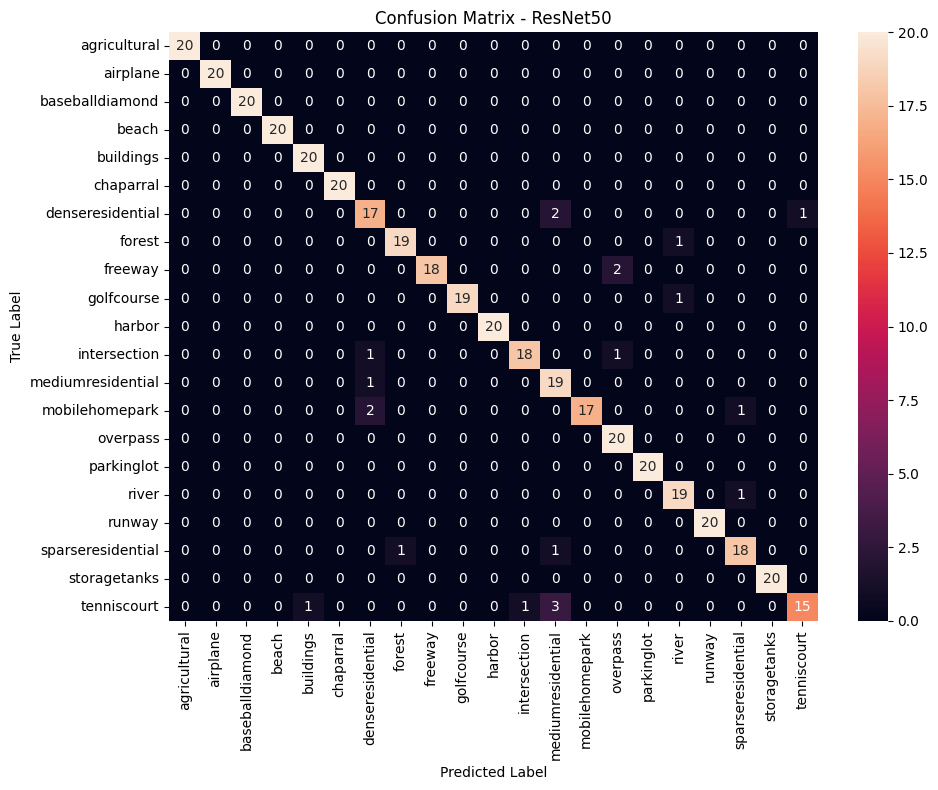

In [ ]:
# Usage
if __name__ == '__main__':
    DATASET_PATH = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images'
    main(DATASET_PATH)

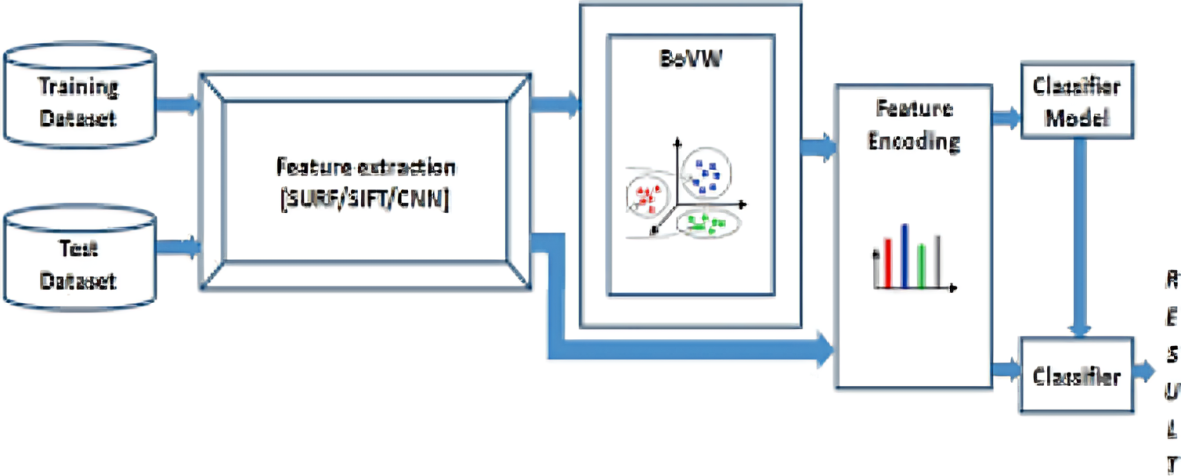

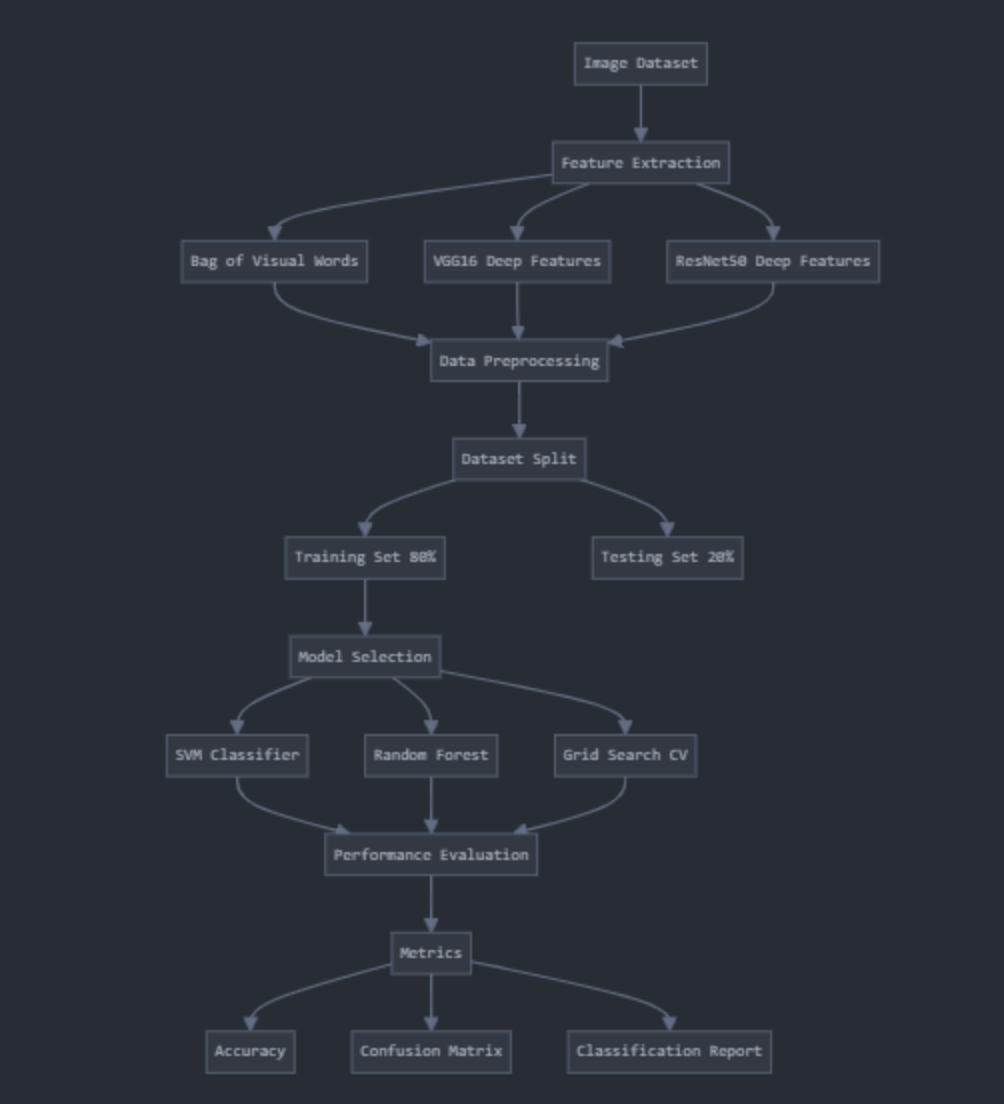